# logistic regression using sklearn

Accuracy for Id vs SepalLengthCm: 1.0
Accuracy for Id vs SepalWidthCm: 0.9666666666666667
Accuracy for Id vs PetalLengthCm: 1.0
Accuracy for SepalLengthCm vs SepalWidthCm: 0.9
Accuracy for SepalLengthCm vs PetalLengthCm: 1.0
Accuracy for SepalWidthCm vs PetalLengthCm: 1.0


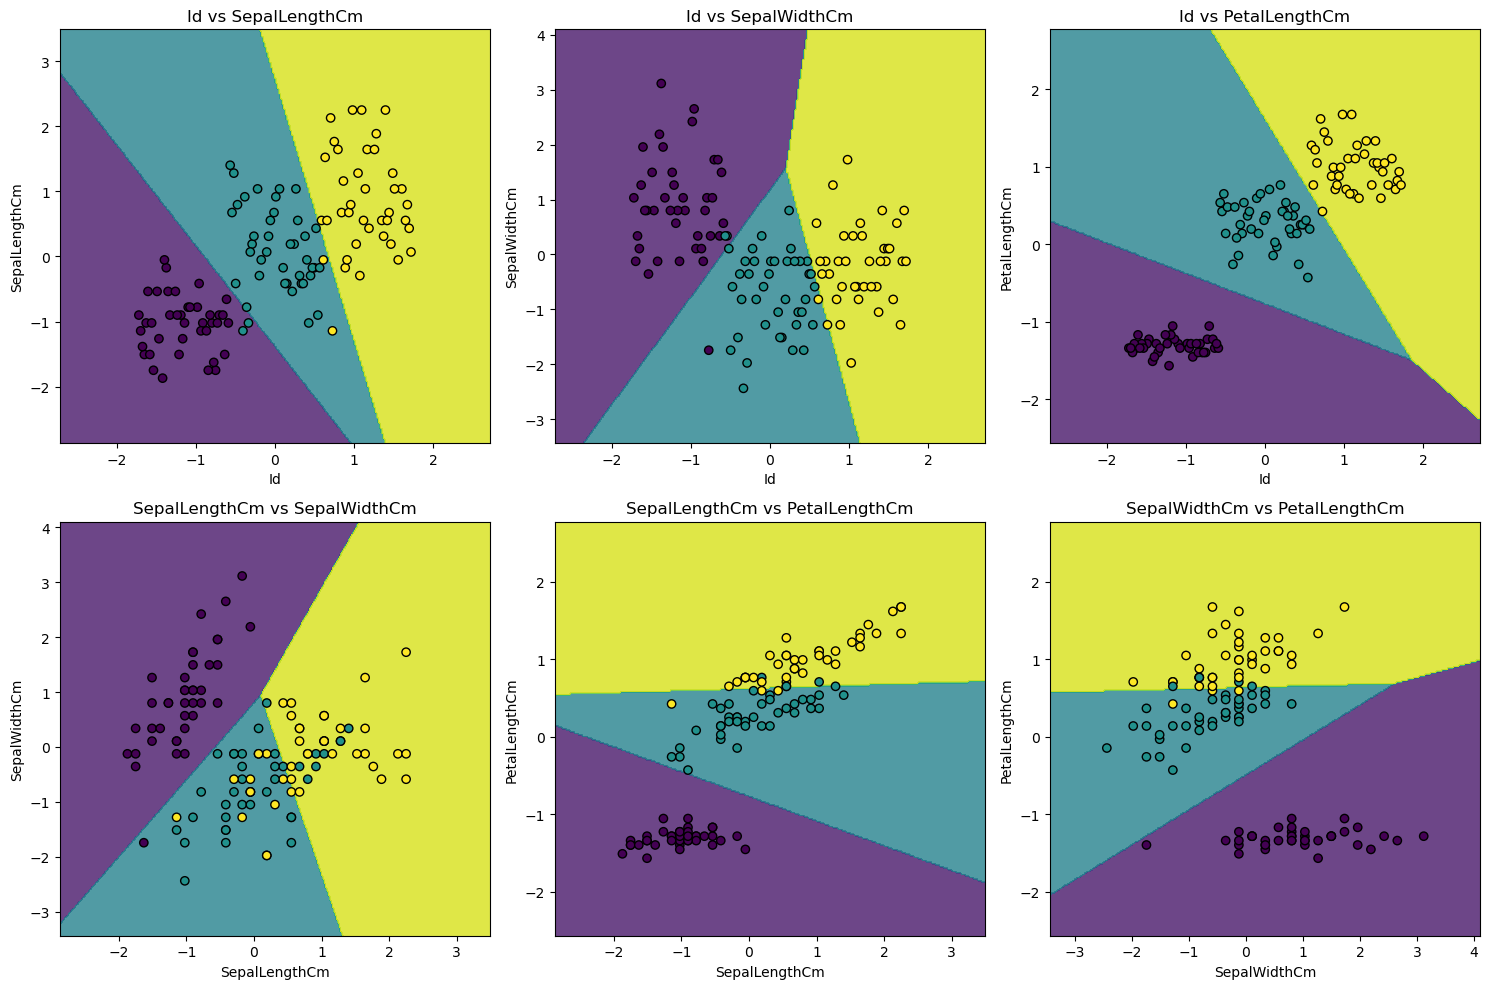

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
dataset = pd.read_csv('iris.csv')

# Encoding the categorical target variable
label_encoder = LabelEncoder()
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])

# Splitting the dataset into features and target variable
X = dataset.drop('Species', axis=1)
y = dataset['Species']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define feature names
feature_names = dataset.columns[:-1]

# Create all possible pairs of features
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create subplots
plt.figure(figsize=(15, 10))

# Plot decision boundaries for each pair of features
for i, (x0, x1) in enumerate(pairs, start=1):
    plt.subplot(2, 3, i)

    # Select features
    X_pair = X[:, [x0, x1]]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.2, random_state=42)

    # Fit logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {feature_names[x0]} vs {feature_names[x1]}: {accuracy}")

    # Plot decision boundaries
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.xlabel(feature_names[x0])
    plt.ylabel(feature_names[x1])
    plt.title(f'{feature_names[x0]} vs {feature_names[x1]}')

plt.tight_layout()
plt.show()
